In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import  train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,cohen_kappa_score,precision_score,recall_score,f1_score,classification_report
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data=pd.read_csv('UCI_Credit_Card.csv')

In [4]:
data.shape

(30000, 25)

In [5]:
pd.set_option('display.max_columns',25)

In [6]:
data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   default.payment.next.month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [8]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [9]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [10]:
data.drop('ID',axis=1,inplace=True)

In [11]:
data.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   default.payment.next.month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

In [12]:
data['default']=data['default.payment.next.month']
data.drop('default.payment.next.month',axis=1,inplace=True)

In [13]:
data.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   default  
0        1  
1        1  
2        0  
3        0  
4        0

In [14]:
data['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

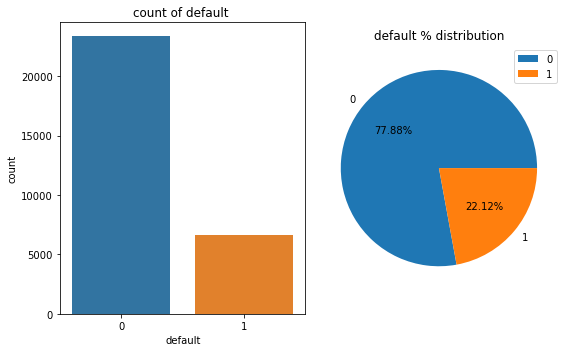

In [15]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sb.countplot(data['default'])
plt.title('count of default ')
plt.xlabel('default')

plt.subplot(1,2,2)
s=data['default'].value_counts()
label=data['default'].value_counts().index
plt.pie(s,labels=label,autopct='%.2f%%')
plt.title('default % distribution')
plt.tight_layout()
plt.legend()
plt.show()

we can see from above graph both classes in default are not in proportion and we have imbalance dataset 

In [16]:
# SEX: Gender (1=male, 2=female)

data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

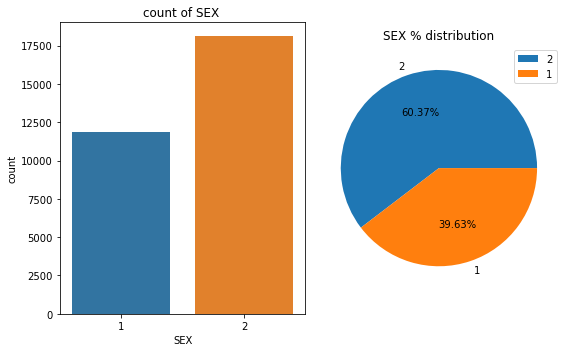

In [17]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sb.countplot(data['SEX'])
plt.title('count of SEX ')
plt.xlabel('SEX')

plt.subplot(1,2,2)
s=data['SEX'].value_counts()
label=data['SEX'].value_counts().index
plt.pie(s,labels=label,autopct='%.2f%%')
plt.title('SEX % distribution')
plt.tight_layout()
plt.legend()
plt.show()

from above graph we can see that female %  as credit card holders is more than male credit card holders   

In [18]:
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

we see that 0,5,6 are unknown soo we can add with 4 

In [19]:
data.loc[(data['EDUCATION']==0) | (data['EDUCATION']==5) | (data['EDUCATION']==6),'EDUCATION']=4

In [20]:
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

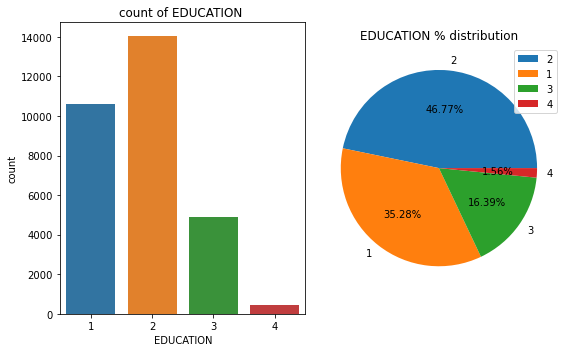

In [21]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sb.countplot(data['EDUCATION'])
plt.title('count of EDUCATION ')
plt.xlabel('EDUCATION')

plt.subplot(1,2,2)
s=data['EDUCATION'].value_counts()
label=data['EDUCATION'].value_counts().index
plt.pie(s,labels=label,autopct='%.2f%%')
plt.title('EDUCATION % distribution')
plt.tight_layout()
plt.legend()
plt.show()

In [22]:
# MARRIAGE: Marital status (1=married, 2=single, 3=others)

data.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

we can  see 0 as unknown value soo we can add with 3=other

In [23]:
data.loc[data['MARRIAGE']==0,'MARRIAGE']=3

In [24]:
data.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

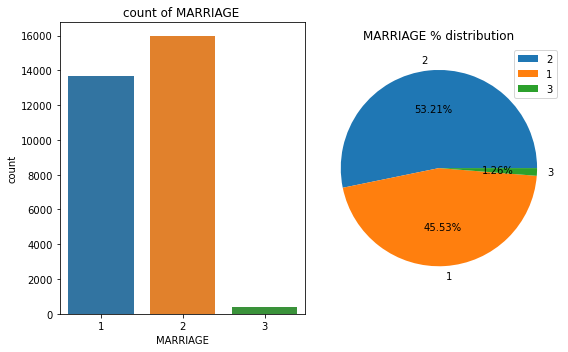

In [25]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sb.countplot(data['MARRIAGE'])
plt.title('count of MARRIAGE ')
plt.xlabel('MARRIAGE')

plt.subplot(1,2,2)
s=data['MARRIAGE'].value_counts()
label=data['MARRIAGE'].value_counts().index
plt.pie(s,labels=label,autopct='%.2f%%')
plt.title('MARRIAGE % distribution')
plt.tight_layout()
plt.legend()
plt.show()

In [26]:
# LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

data['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

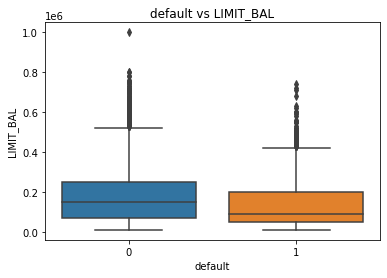

In [27]:
sb.boxplot(x=data['default'],y=data['LIMIT_BAL'])
plt.title('default vs LIMIT_BAL')
plt.show()

In [28]:
data.groupby('default')['LIMIT_BAL'].mean()

default
0    178099.726074
1    130109.656420
Name: LIMIT_BAL, dtype: float64

In [29]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [30]:
# rename column names

data.rename(columns={'PAY_0':'PAY_SEP','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN',
                     'PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)

data.rename(columns={'PAY_AMT1':'PAY__AMT_SEP','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN',
                     'PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

data.rename(columns={'BILL_AMT1':'BILL_SEP','BILL_AMT2':'BILL_AUG','BILL_AMT3':'BILL_JUL','BILL_AMT4':'BILL_JUN',
                    'BILL_AMT5':'BILL_MAY','BILL_AMT6':'BILL_APR'},inplace=True)

In [31]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_SEP',
       'BILL_AUG', 'BILL_JUL', 'BILL_JUN', 'BILL_MAY', 'BILL_APR',
       'PAY__AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'default'],
      dtype='object')

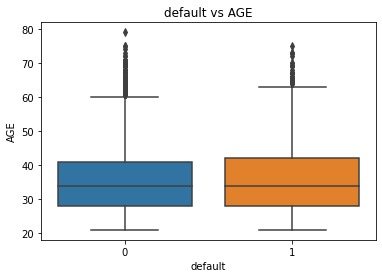

In [32]:
sb.boxplot(x=data['default'],y=data['AGE'])
plt.title('default vs AGE')
plt.show()

In [33]:
data.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEP  PAY_AUG  PAY_JUL  \
0    20000.0    2          2         1   24        2        2       -1   
1   120000.0    2          2         2   26       -1        2        0   
2    90000.0    2          2         2   34        0        0        0   
3    50000.0    2          2         1   37        0        0        0   
4    50000.0    1          2         1   57       -1        0       -1   

   PAY_JUN  PAY_MAY  PAY_APR  BILL_SEP  BILL_AUG  BILL_JUL  BILL_JUN  \
0       -1       -2       -2    3913.0    3102.0     689.0       0.0   
1        0        0        2    2682.0    1725.0    2682.0    3272.0   
2        0        0        0   29239.0   14027.0   13559.0   14331.0   
3        0        0        0   46990.0   48233.0   49291.0   28314.0   
4        0        0        0    8617.0    5670.0   35835.0   20940.0   

   BILL_MAY  BILL_APR  PAY__AMT_SEP  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  \
0       0.0       0.0           0.0        689.0          0.0          0.0   
1    3455.0    3261.0           0.0       1000.0       1000.0       1000.0   
2   14948.0   15549.0        1518.0       1500.0       1000.0       1000.0   
3   28959.0   29547.0        2000.0       2019.0       1200.0       1100.0   
4   19146.0   19131.0        2000.0      36681.0      10000.0       9000.0   

   PAY_AMT_MAY  PAY_AMT_APR  default  
0          0.0          0.0        1  
1          0.0       2000.0        1  
2       1000.0       5000.0        0  
3       1069.0       1000.0        0  
4        689.0        679.0        0

In [34]:
x=data.drop('default',1)
y=data['default']

# As we have seen earlier that we have imbalanced dataset. 
# So to remediate Imbalance we are using SMOTE(Synthetic Minority Oversampling Technique)

In [35]:
from imblearn.over_sampling import SMOTE

sm=SMOTE()

x_smote,y_smote=sm.fit_resample(x,y)

print('len of x',len(x))
print('len of x_smote',len(x_smote))

len of x 30000
len of x_smote 46728


In [36]:
x_smote.shape

(46728, 23)

In [37]:
y_smote.shape

(46728,)

In [38]:
x_smote.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_SEP',
       'BILL_AUG', 'BILL_JUL', 'BILL_JUN', 'BILL_MAY', 'BILL_APR',
       'PAY__AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR'],
      dtype='object')

In [39]:
column=list(x_smote.columns)
column

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_SEP',
 'PAY_AUG',
 'PAY_JUL',
 'PAY_JUN',
 'PAY_MAY',
 'PAY_APR',
 'BILL_SEP',
 'BILL_AUG',
 'BILL_JUL',
 'BILL_JUN',
 'BILL_MAY',
 'BILL_APR',
 'PAY__AMT_SEP',
 'PAY_AMT_AUG',
 'PAY_AMT_JUL',
 'PAY_AMT_JUN',
 'PAY_AMT_MAY',
 'PAY_AMT_APR']

In [40]:
da=pd.DataFrame(x_smote,columns=column)

In [41]:
da['default']=y_smote

In [42]:
da.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEP  PAY_AUG  PAY_JUL  \
0    20000.0    2          2         1   24        2        2       -1   
1   120000.0    2          2         2   26       -1        2        0   
2    90000.0    2          2         2   34        0        0        0   
3    50000.0    2          2         1   37        0        0        0   
4    50000.0    1          2         1   57       -1        0       -1   

   PAY_JUN  PAY_MAY  PAY_APR  BILL_SEP  BILL_AUG  BILL_JUL  BILL_JUN  \
0       -1       -2       -2    3913.0    3102.0     689.0       0.0   
1        0        0        2    2682.0    1725.0    2682.0    3272.0   
2        0        0        0   29239.0   14027.0   13559.0   14331.0   
3        0        0        0   46990.0   48233.0   49291.0   28314.0   
4        0        0        0    8617.0    5670.0   35835.0   20940.0   

   BILL_MAY  BILL_APR  PAY__AMT_SEP  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  \
0       0.0       0.0           0.0        689.0          0.0          0.0   
1    3455.0    3261.0           0.0       1000.0       1000.0       1000.0   
2   14948.0   15549.0        1518.0       1500.0       1000.0       1000.0   
3   28959.0   29547.0        2000.0       2019.0       1200.0       1100.0   
4   19146.0   19131.0        2000.0      36681.0      10000.0       9000.0   

   PAY_AMT_MAY  PAY_AMT_APR  default  
0          0.0          0.0        1  
1          0.0       2000.0        1  
2       1000.0       5000.0        0  
3       1069.0       1000.0        0  
4        689.0        679.0        0

In [43]:
# SEX: Gender (1=male, 2=female)
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# MARRIAGE: Marital status (1=married, 2=single, 3=others)

da['SEX']=da['SEX'].replace([1,2],['male','female'])
da['EDUCATION']=da['EDUCATION'].replace([1,2,3,4],['graduate school','university','high school','others'])
da['MARRIAGE']=da['MARRIAGE'].replace([1,2,3],['married','single','other'])

In [44]:
da.head()

LIMIT_BAL     SEX   EDUCATION MARRIAGE  AGE  PAY_SEP  PAY_AUG  PAY_JUL  \
0    20000.0  female  university  married   24        2        2       -1   
1   120000.0  female  university   single   26       -1        2        0   
2    90000.0  female  university   single   34        0        0        0   
3    50000.0  female  university  married   37        0        0        0   
4    50000.0    male  university  married   57       -1        0       -1   

   PAY_JUN  PAY_MAY  PAY_APR  BILL_SEP  BILL_AUG  BILL_JUL  BILL_JUN  \
0       -1       -2       -2    3913.0    3102.0     689.0       0.0   
1        0        0        2    2682.0    1725.0    2682.0    3272.0   
2        0        0        0   29239.0   14027.0   13559.0   14331.0   
3        0        0        0   46990.0   48233.0   49291.0   28314.0   
4        0        0        0    8617.0    5670.0   35835.0   20940.0   

   BILL_MAY  BILL_APR  PAY__AMT_SEP  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  \
0       0.0       0.0           0.0        689.0          0.0          0.0   
1    3455.0    3261.0           0.0       1000.0       1000.0       1000.0   
2   14948.0   15549.0        1518.0       1500.0       1000.0       1000.0   
3   28959.0   29547.0        2000.0       2019.0       1200.0       1100.0   
4   19146.0   19131.0        2000.0      36681.0      10000.0       9000.0   

   PAY_AMT_MAY  PAY_AMT_APR  default  
0          0.0          0.0        1  
1          0.0       2000.0        1  
2       1000.0       5000.0        0  
3       1069.0       1000.0        0  
4        689.0        679.0        0

In [45]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46728 entries, 0 to 46727
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LIMIT_BAL     46728 non-null  float64
 1   SEX           46728 non-null  object 
 2   EDUCATION     46728 non-null  object 
 3   MARRIAGE      46728 non-null  object 
 4   AGE           46728 non-null  int64  
 5   PAY_SEP       46728 non-null  int64  
 6   PAY_AUG       46728 non-null  int64  
 7   PAY_JUL       46728 non-null  int64  
 8   PAY_JUN       46728 non-null  int64  
 9   PAY_MAY       46728 non-null  int64  
 10  PAY_APR       46728 non-null  int64  
 11  BILL_SEP      46728 non-null  float64
 12  BILL_AUG      46728 non-null  float64
 13  BILL_JUL      46728 non-null  float64
 14  BILL_JUN      46728 non-null  float64
 15  BILL_MAY      46728 non-null  float64
 16  BILL_APR      46728 non-null  float64
 17  PAY__AMT_SEP  46728 non-null  float64
 18  PAY_AMT_AUG   46728 non-nu

In [46]:
num=da.select_dtypes(exclude='object')
num.head()

LIMIT_BAL  AGE  PAY_SEP  PAY_AUG  PAY_JUL  PAY_JUN  PAY_MAY  PAY_APR  \
0    20000.0   24        2        2       -1       -1       -2       -2   
1   120000.0   26       -1        2        0        0        0        2   
2    90000.0   34        0        0        0        0        0        0   
3    50000.0   37        0        0        0        0        0        0   
4    50000.0   57       -1        0       -1        0        0        0   

   BILL_SEP  BILL_AUG  BILL_JUL  BILL_JUN  BILL_MAY  BILL_APR  PAY__AMT_SEP  \
0    3913.0    3102.0     689.0       0.0       0.0       0.0           0.0   
1    2682.0    1725.0    2682.0    3272.0    3455.0    3261.0           0.0   
2   29239.0   14027.0   13559.0   14331.0   14948.0   15549.0        1518.0   
3   46990.0   48233.0   49291.0   28314.0   28959.0   29547.0        2000.0   
4    8617.0    5670.0   35835.0   20940.0   19146.0   19131.0        2000.0   

   PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  default  
0        689.0          0.0          0.0          0.0          0.0        1  
1       1000.0       1000.0       1000.0          0.0       2000.0        1  
2       1500.0       1000.0       1000.0       1000.0       5000.0        0  
3       2019.0       1200.0       1100.0       1069.0       1000.0        0  
4      36681.0      10000.0       9000.0        689.0        679.0        0

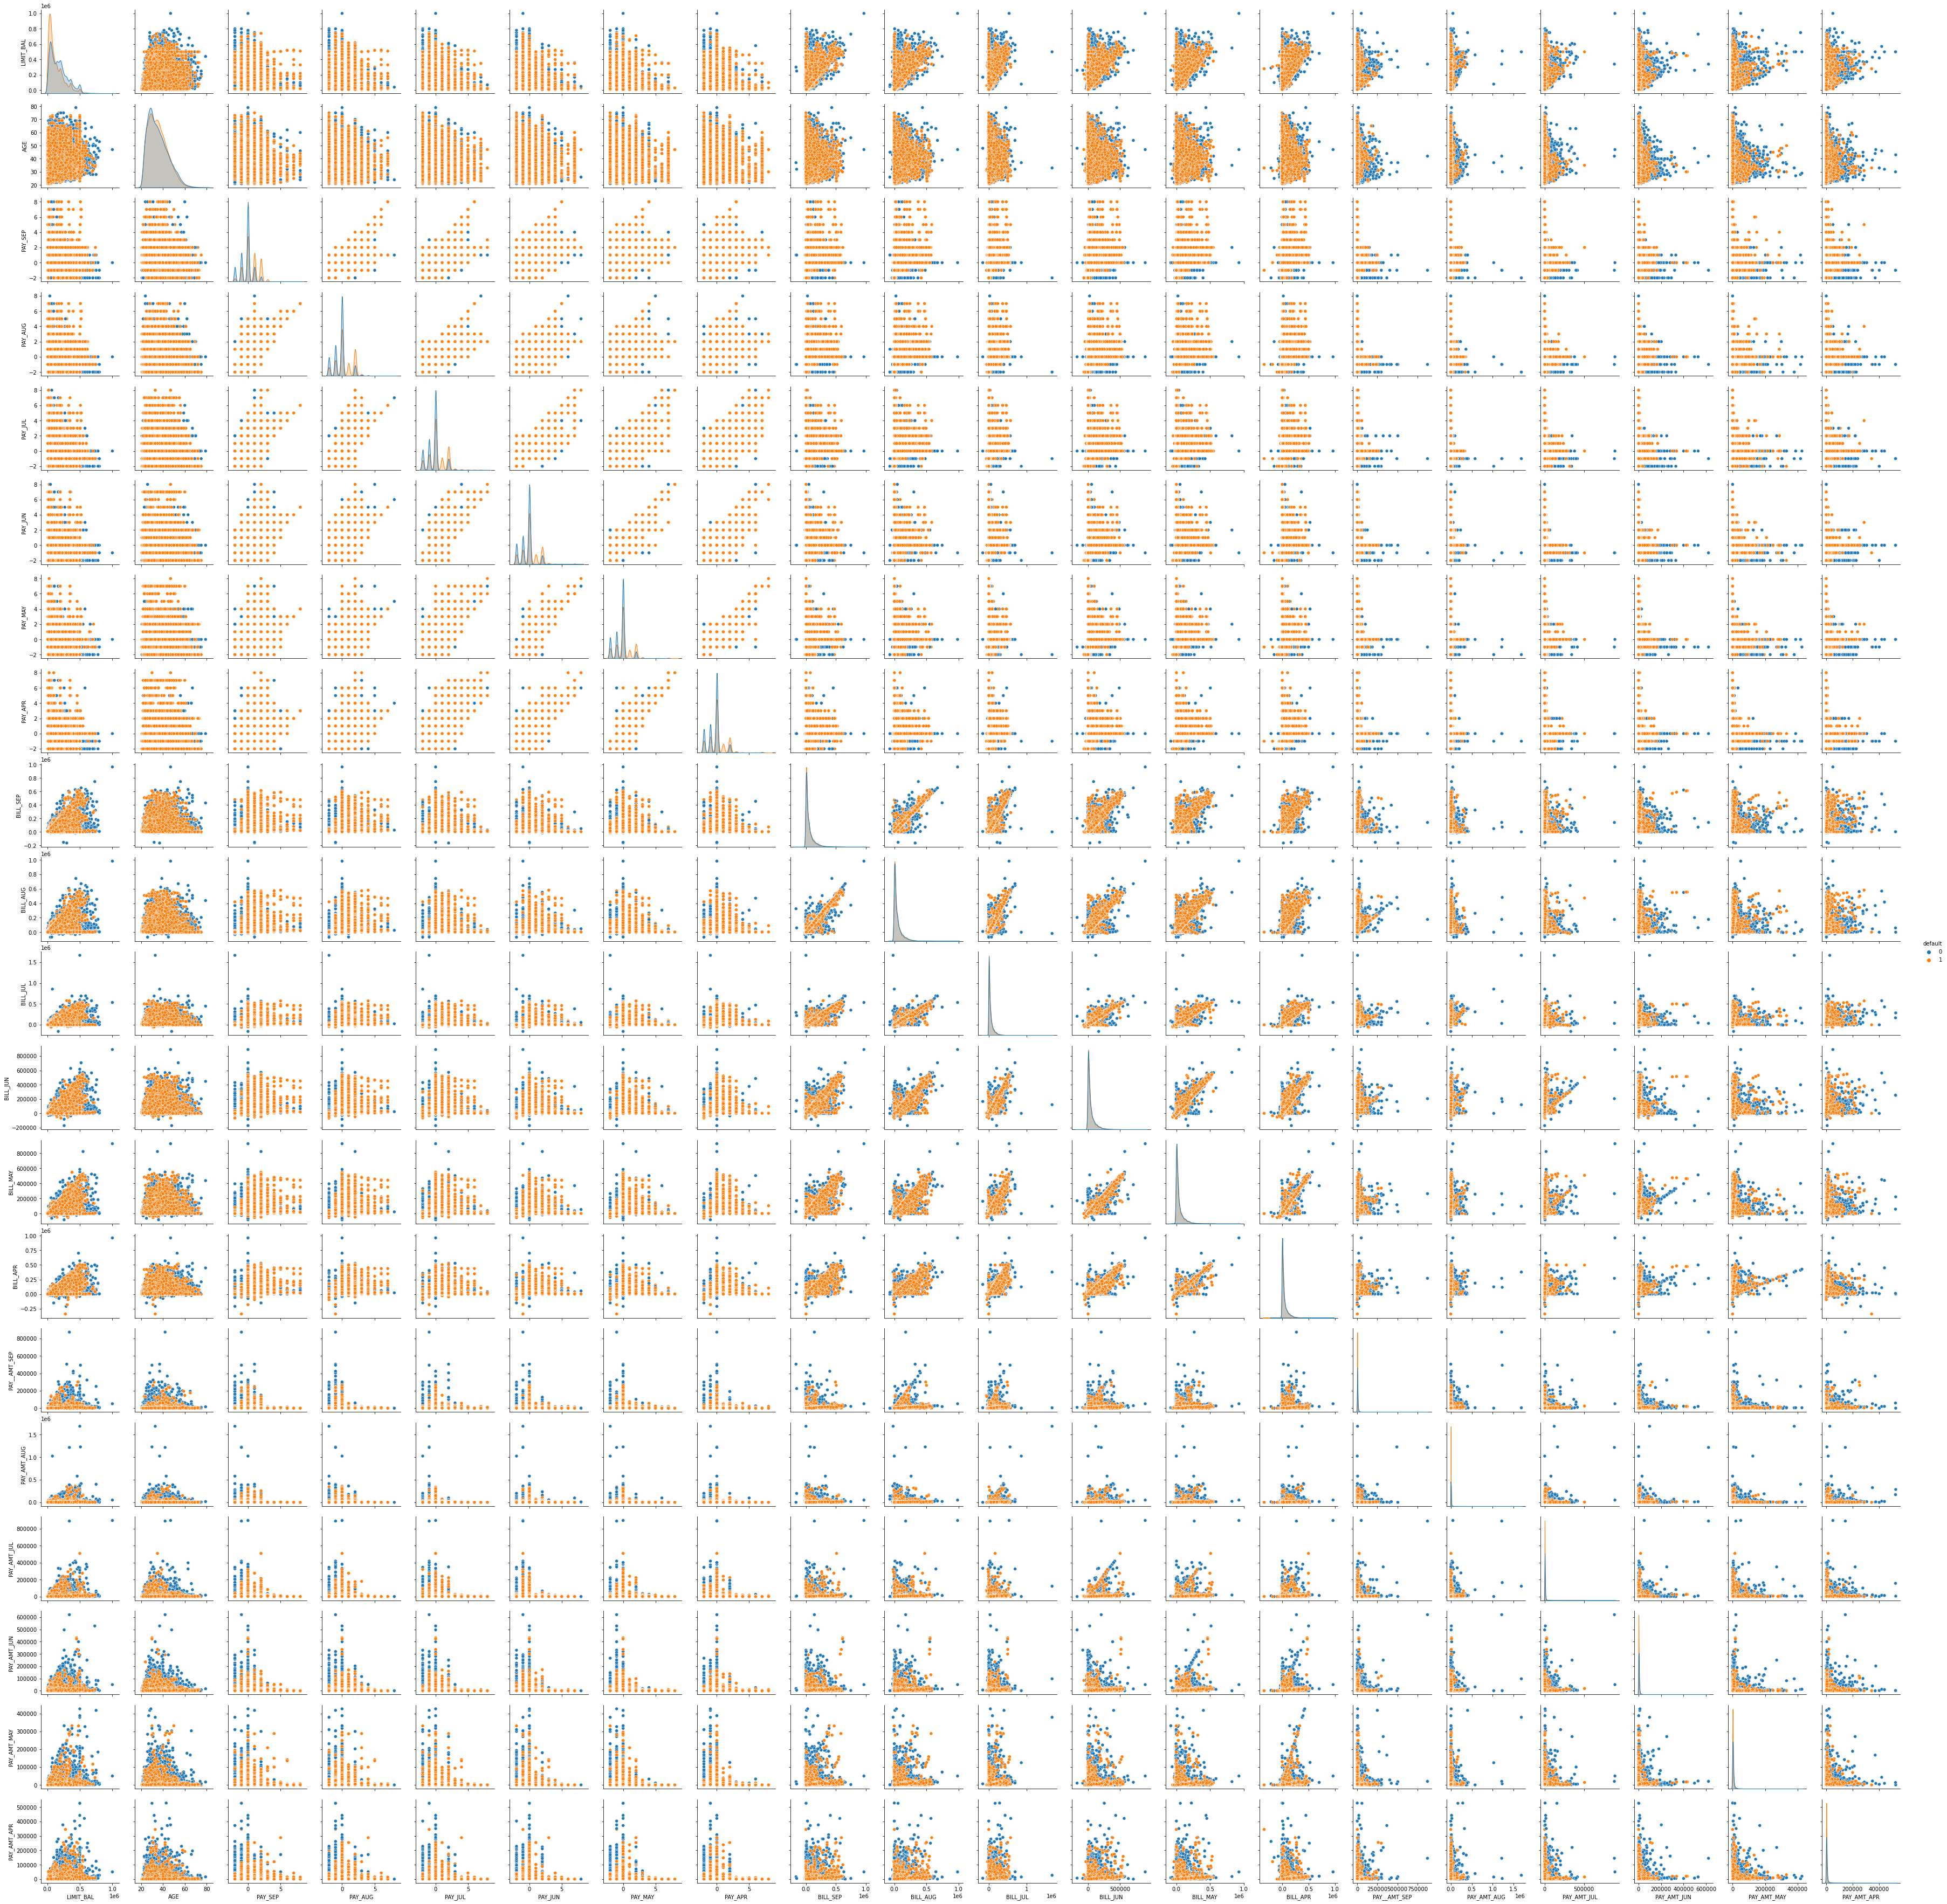

In [47]:
sb.pairplot(num,hue='default')
plt.show()

In [47]:
inp=da.drop('default',1)
out=da['default']

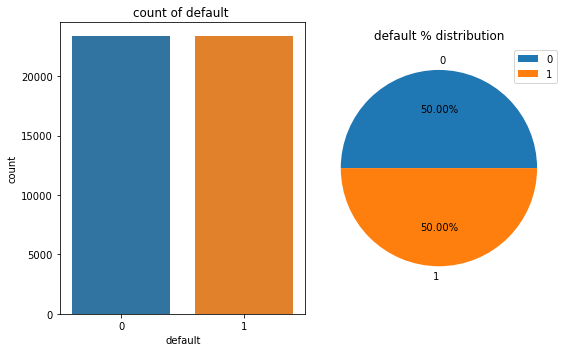

In [48]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sb.countplot(da['default'])
plt.title('count of default ')
plt.xlabel('default')

plt.subplot(1,2,2)
s=da['default'].value_counts()
label=da['default'].value_counts().index
plt.pie(s,labels=label,autopct='%.2f%%')
plt.title('default % distribution')
plt.tight_layout()
plt.legend()
plt.show()

In [49]:
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.2,random_state=42,stratify=out)

In [50]:
xtrain

LIMIT_BAL     SEX        EDUCATION MARRIAGE  AGE  PAY_SEP  PAY_AUG  \
33483  180000.000000    male  graduate school   single   27        0        0   
25265  110000.000000  female       university   single   24        0        0   
8062   220000.000000    male       university   single   30       -1        0   
18919  150000.000000  female  graduate school   single   28        2        0   
8203    20000.000000  female  graduate school   single   22        0        0   
...              ...     ...              ...      ...  ...      ...      ...   
38551  318362.138905  female       university  married   29        0        0   
33557   60000.000000    male  graduate school   single   28        0        0   
34959   50000.000000    male       university  married   48        0        0   
46496  155973.613374    male  graduate school  married   49        1        1   
34847   10000.000000    male       university  married   39        1        2   

       PAY_JUL  PAY_JUN  PAY_MAY  PAY_APR       BILL_SEP       BILL_AUG  \
33483        0       -1       -1        0    3782.147309    3302.435811   
25265        0        0        0        0   98843.000000   92820.000000   
8062         0       -2       -2       -2    2501.000000    2071.000000   
18919        0        0        0        0   65809.000000   55997.000000   
8203         2        0        0        0   10003.000000   13329.000000   
...        ...      ...      ...      ...            ...            ...   
38551        1        0        0        0  316963.898142  311453.422052   
33557        0        0        0        0     331.764177     331.764177   
34959        0        0        1        0    5111.546224    7012.670589   
46496        1        1        1        2   59377.601289   58604.196467   
34847        1        2        1        1    7408.040253    7104.806153   

            BILL_JUL       BILL_JUN       BILL_MAY       BILL_APR  \
33483     304.874968     638.758562     899.073277     726.591911   
25265   78232.000000   69426.000000   70987.000000   75835.000000   
8062        0.000000       0.000000       0.000000       0.000000   
18919   46392.000000   36172.000000   25767.000000   16791.000000   
8203    11613.000000   10750.000000   10606.000000    7263.000000   
...              ...            ...            ...            ...   
38551  289375.708836  266866.805727  244444.009267  237737.641179   
33557     331.764177     331.764177     271.260448     241.008583   
34959    8181.963215   10036.837834    9915.400312   11286.548468   
46496   60650.884703   61967.546067   65206.154900   64878.472048   
34847    8855.639332    8597.637387    8265.320205    9130.766977   

       PAY__AMT_SEP  PAY_AMT_AUG   PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
33483   1145.556317   304.874968    638.758562  1039.645592   304.874968   
25265   3200.000000  3500.000000   3000.000000  3500.000000  7000.000000   
8062    1000.000000     0.000000      0.000000     0.000000     0.000000   
18919   1498.000000  1614.000000   1227.000000   655.000000  2000.000000   
8203    4211.000000     0.000000    237.000000   242.000000   163.000000   
...             ...          ...           ...          ...          ...   
38551  12172.427781  1602.535957  10773.542151  8936.213891  8749.135833   
33557    210.756718   210.756718    210.756718   210.756718   210.756718   
34959   2000.000000  1443.730952   2000.000000   187.563494  1699.898409   
46496    603.957994  2958.416802   2798.680669  4396.042006   603.957994   
34847      0.000000  1970.840541      0.000000     0.000000  1122.651453   

       PAY_AMT_APR  
33483  1517.710243  
25265  3000.000000  
8062      0.000000  
18919  5000.000000  
8203     22.000000  
...            ...  
38551  9090.624634  
33557   118.183951  
34959  1000.000000  
46496  3000.000000  
34847   898.961482  

[37382 rows x 23 columns]

In [51]:
xtest

LIMIT_BAL     SEX        EDUCATION MARRIAGE  AGE  PAY_SEP  PAY_AUG  \
6525    330000.0  female       university  married   30        0        0   
22188    50000.0  female  graduate school   single   29        0        0   
7498    210000.0  female       university  married   30        1       -1   
20570   100000.0    male  graduate school   single   26        0        0   
35140    70000.0  female  graduate school  married   34        0        0   
...          ...     ...              ...      ...  ...      ...      ...   
23415    20000.0  female       university  married   46        4        3   
42886    50000.0    male       university  married   34        0        0   
11227   170000.0    male       university   single   29       -1       -1   
42771    30000.0  female       university  married   45        1        1   
14188    50000.0    male       university   single   35        0        0   

       PAY_JUL  PAY_JUN  PAY_MAY  PAY_APR       BILL_SEP       BILL_AUG  \
6525         0        0        0       -1  155285.000000  156122.000000   
22188        0        0       -1        0   22120.000000   14577.000000   
7498        -1        0        0       -1       0.000000     241.000000   
20570        0       -1        0        0    1847.000000    3614.000000   
35140        0        0        0        0   68620.028347   69410.781845   
...        ...      ...      ...      ...            ...            ...   
23415        2        3        2        0   15833.000000   15286.000000   
42886        0        0        0        0   15078.647470   16075.595031   
11227        0       -1       -1       -1    3362.000000   64602.000000   
42771        1        1        2        1   21946.535080   22697.540367   
14188        0        0        0        0   41970.000000   31319.000000   

           BILL_JUL      BILL_JUN      BILL_MAY      BILL_APR  PAY__AMT_SEP  \
6525   11733.000000   9620.000000      0.000000   4520.000000  10000.000000   
22188  16275.000000  23790.000000   2250.000000   2100.000000   4000.000000   
7498    4651.000000   4746.000000   3938.000000   3479.000000    241.000000   
20570   3252.000000  42058.000000  33171.000000  18379.000000   2000.000000   
35140  70013.672011  72170.000527  70544.430382  61278.282023   2687.454417   
...             ...           ...           ...           ...           ...   
23415  17021.000000  16461.000000  15901.000000  16294.000000      0.000000   
42886  17799.209970  19494.552708  22392.302762  24894.478879   1342.738454   
11227  18070.000000    910.000000   9080.000000   4839.000000  64612.000000   
42771  23187.364475  24762.295900  24817.064799  24458.595576   1360.749188   
14188  18172.000000  18687.000000  19234.000000  19552.000000   1291.000000   

        PAY_AMT_AUG   PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  
6525   10000.000000   2000.000000     0.000000  4520.000000  2500.000000  
22188   3096.000000  12000.000000  2250.000000   500.000000     0.000000  
7498    4651.000000     95.000000   301.000000  3479.000000  1000.000000  
20570   2000.000000  42058.000000   500.000000  2000.000000  2000.000000  
35140   2662.441445   4609.257235  1572.547986  2192.609752  2343.191486  
...             ...           ...          ...          ...          ...  
23415   2277.000000      0.000000     0.000000   800.000000  1400.000000  
42886   2000.000000   2000.000000  3342.738454  2985.892318  1342.738454  
11227   4000.000000    910.000000  9080.000000  4839.000000  5130.000000  
42771   1150.630164   2209.481384   752.231704   152.693906  1994.109507  
14188   1303.000000    818.000000  1000.000000   787.000000   559.000000  

[9346 rows x 23 columns]

In [52]:
ytrain

33483    1
25265    0
8062     0
18919    1
8203     0
        ..
38551    1
33557    1
34959    1
46496    1
34847    1
Name: default, Length: 37382, dtype: int64

In [53]:
ytest

6525     0
22188    0
7498     0
20570    0
35140    1
        ..
23415    1
42886    1
11227    0
42771    1
14188    0
Name: default, Length: 9346, dtype: int64

In [54]:
ls=['SEX', 'EDUCATION', 'MARRIAGE']

for i in ls:
    print(da[i].unique())

['female' 'male']
['university' 'graduate school' 'high school' 'others']
['married' 'single' 'other']


In [55]:
s=0
for i in ls:
    s=s+len(da[i].unique())
s

9

# LogisticRegression

In [56]:
lr1=ColumnTransformer([
    ('onehot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,3])
],remainder='passthrough')
lr2=ColumnTransformer([
    ('scalar',StandardScaler(),slice(0,28))
])
lr3=LogisticRegression()


lr_pipe=Pipeline([
    ('lr1',lr1),
    ('lr2',lr2),
    ('lr3',lr3)
])

lr_pipe.fit(xtrain,ytrain)

lr_ypred=lr_pipe.predict(xtest)

print('accuracy',accuracy_score(ytest,lr_ypred))
print('fl_score',f1_score(ytest,lr_ypred))
print(classification_report(ytest,lr_ypred))

accuracy 0.7150652685640916
fl_score 0.7170332589522899
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      4673
           1       0.71      0.72      0.72      4673

    accuracy                           0.72      9346
   macro avg       0.72      0.72      0.72      9346
weighted avg       0.72      0.72      0.72      9346



In [58]:
lr_param={'lr3__penalty':['l1','l2','elasticnet'],'lr3__C':[100,10,1,0.1,0.01]}
search=GridSearchCV(lr_pipe,param_grid=lr_param,cv=5,scoring='accuracy')
mod_lr=search.fit(inp,out)
print('best_param',mod_lr.best_params_)
print('best_score',mod_lr.best_score_)

best_param {'lr3__C': 0.1, 'lr3__penalty': 'l2'}
best_score 0.7142631102458176


# DecisionTreeClassifier

In [59]:
dt1=ColumnTransformer([
    ('onehot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,3])
],remainder='passthrough')
dt2=ColumnTransformer([
    ('scalar',StandardScaler(),slice(0,28))
])
dt3=DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_leaf=1)


dt_pipe=Pipeline([
    ('dt1',dt1),
    ('dt2',dt2),
    ('dt3',dt3)
])

dt_pipe.fit(xtrain,ytrain)

dt_ypred=dt_pipe.predict(xtest)

print('accuracy',accuracy_score(ytest,dt_ypred))
print('fl_score',f1_score(ytest,dt_ypred))
print(classification_report(ytest,dt_ypred))

accuracy 0.7509094799914402
fl_score 0.7420212765957447
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      4673
           1       0.77      0.72      0.74      4673

    accuracy                           0.75      9346
   macro avg       0.75      0.75      0.75      9346
weighted avg       0.75      0.75      0.75      9346



In [66]:
dt_param={'dt3__criterion':['gini','entropy'],'dt3__max_depth':[2,3,4,5,6,7,8,9],'dt3__min_samples_leaf':[1,2,3,4,5]}
search=GridSearchCV(dt_pipe,param_grid=dt_param,cv=5,scoring='accuracy')
mod_lr=search.fit(inp,out)
print('best_param',mod_lr.best_params_)
print('best_score',mod_lr.best_score_)

best_param {'dt3__criterion': 'entropy', 'dt3__max_depth': 8, 'dt3__min_samples_leaf': 5}
best_score 0.7369262650539505


# RandomForestClassifier

In [57]:
r1=ColumnTransformer([
    ('onehot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,3])
],remainder='passthrough')
r2=ColumnTransformer([
    ('scalar',StandardScaler(),slice(0,28))
])
r3=RandomForestClassifier()


r_pipe=Pipeline([
    ('r1',r1),
    ('r2',r2),
    ('r3',r3)
])

r_pipe.fit(xtrain,ytrain)

r_ypred=r_pipe.predict(xtest)

print('accuracy',accuracy_score(ytest,r_ypred))
print('fl_score',f1_score(ytest,r_ypred))
print(classification_report(ytest,r_ypred))

accuracy 0.8365075968328697
fl_score 0.833587453713788
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4673
           1       0.85      0.82      0.83      4673

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346



In [61]:
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt','log2']
max_depth=[int(x) for x in np.linspace(10,1000,10)]
min_samples_split=[1,3,4,5,7,9]
min_sample_leaf=[1,2,4,6,8]
random_grid={
    'r3__n_estimators':n_estimators,
    'r3__max_features':max_features,
    'r3__max_depth':max_depth,
    'r3__min_samples_split':min_samples_split,
    'r3__min_samples_leaf':min_sample_leaf,
    'r3__criterion':['entropy','gini']
}
print(random_grid)

{'r3__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'r3__max_features': ['auto', 'sqrt', 'log2'], 'r3__max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'r3__min_samples_split': [1, 3, 4, 5, 7, 9], 'r3__min_samples_leaf': [1, 2, 4, 6, 8], 'r3__criterion': ['entropy', 'gini']}


In [62]:
rf=RandomForestClassifier()
random_cv=RandomizedSearchCV(estimator=r_pipe,param_distributions=random_grid,n_iter=100,cv=5,
                             verbose=2,random_state=100,n_jobs=-1)
random_cv.fit(xtrain,ytrain)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('r1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               [1,
                                                                                2,
                                                                                3])])),
                                             ('r2',
                                              ColumnTransformer(transformers=[('scalar',
                                                                               StandardScaler(),
                                                                               slice(0, 28, None))])),
                                             ('r3', RandomForestClassifier())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'r3__criterion': ['entropy', 'gini'],
                                        'r3__max_depth': [10, 120, 230, 340,
                                                          450, 560, 670, 780,
                                                          890, 1000],
                                        'r3__max_features': ['auto', 'sqrt',
                                                             'log2'],
                                        'r3__min_samples_leaf': [1, 2, 4, 6, 8],
                                        'r3__min_samples_split': [1, 3, 4, 5, 7,
                                                                  9],
                                        'r3__n_estimators': [200, 400, 600, 800,
                                                             1000, 1200, 1400,
                                                             1600, 1800,
                                                             2000]},
                   random_state=100, verbose=2)

In [63]:
random_cv.best_params_

{'r3__n_estimators': 400,
 'r3__min_samples_split': 3,
 'r3__min_samples_leaf': 1,
 'r3__max_features': 'auto',
 'r3__max_depth': 120,
 'r3__criterion': 'gini'}

In [58]:
r1=ColumnTransformer([
    ('onehot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,3])
],remainder='passthrough')
r2=ColumnTransformer([
    ('scalar',StandardScaler(),slice(0,28))
])
r3=RandomForestClassifier(n_estimators=450,max_depth=130,min_samples_split=3,min_samples_leaf=1,max_features='auto',criterion='gini')


ra_pipe=Pipeline([
    ('r1',r1),
    ('r2',r2),
    ('r3',r3)
])

ra_pipe.fit(xtrain,ytrain)

r_ypred=ra_pipe.predict(xtest)

print('accuracy',accuracy_score(ytest,r_ypred))
print('fl_score',f1_score(ytest,r_ypred))
print(classification_report(ytest,r_ypred))

accuracy 0.8405735073828375
fl_score 0.838359730961163
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4673
           1       0.85      0.83      0.84      4673

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346



In [58]:
import pickle
pickle.dump(ra_pipe,open('randomforest_credit.pkl','wb'))

# AdaBoostClassifier

In [59]:
ad1=ColumnTransformer([
    ('onehot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,3])
],remainder='passthrough')
ad2=ColumnTransformer([
    ('scalar',StandardScaler(),slice(0,28))
])
ad3=AdaBoostClassifier()


ad_pipe=Pipeline([
    ('ad1',ad1),
    ('ad2',ad2),
    ('ad3',ad3)
])

ad_pipe.fit(xtrain,ytrain)

ad_ypred=ad_pipe.predict(xtest)

print('accuracy',accuracy_score(ytest,ad_ypred))
print('fl_score',f1_score(ytest,ad_ypred))
print(classification_report(ytest,ad_ypred))

accuracy 0.7493045153006633
fl_score 0.7445764744358443
              precision    recall  f1-score   support

           0       0.74      0.77      0.75      4673
           1       0.76      0.73      0.74      4673

    accuracy                           0.75      9346
   macro avg       0.75      0.75      0.75      9346
weighted avg       0.75      0.75      0.75      9346



# GradientBoostingClassifier

In [60]:
gb1=ColumnTransformer([
    ('onehot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,3])
],remainder='passthrough')
gb2=ColumnTransformer([
    ('scalar',StandardScaler(),slice(0,28))
])
gb3=GradientBoostingClassifier()


gb_pipe=Pipeline([
    ('gb1',gb1),
    ('gb2',gb2),
    ('gb3',gb3)
])

gb_pipe.fit(xtrain,ytrain)

gb_ypred=gb_pipe.predict(xtest)

print('accuracy',accuracy_score(ytest,gb_ypred))
print('fl_score',f1_score(ytest,gb_ypred))
print(classification_report(ytest,gb_ypred))

accuracy 0.7815108067622513
fl_score 0.7746634297064666
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      4673
           1       0.80      0.75      0.77      4673

    accuracy                           0.78      9346
   macro avg       0.78      0.78      0.78      9346
weighted avg       0.78      0.78      0.78      9346



# XGBClassifier

In [61]:
xg1=ColumnTransformer([
    ('onehot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,3])
],remainder='passthrough')
xg2=ColumnTransformer([
    ('scalar',StandardScaler(),slice(0,28))
])
xg3=XGBClassifier()


xg_pipe=Pipeline([
    ('xg1',xg1),
    ('xg2',xg2),
    ('xg3',xg3)
])

xg_pipe.fit(xtrain,ytrain)

xg_ypred=xg_pipe.predict(xtest)

print('accuracy',accuracy_score(ytest,xg_ypred))
print('fl_score',f1_score(ytest,xg_ypred))
print(classification_report(ytest,xg_ypred))

accuracy 0.8212069334474642
fl_score 0.8178349503979069
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      4673
           1       0.83      0.80      0.82      4673

    accuracy                           0.82      9346
   macro avg       0.82      0.82      0.82      9346
weighted avg       0.82      0.82      0.82      9346



In [72]:
param = {"xg3__subsample":[0.5, 0.75, 1],
"xg3__colsample_bytree":[0.5, 0.75, 1],
"xg3__max_depth":[2,5,7,9, 6,10, 12],
"xg3__min_child_weight":[1,5,15,7,10],
"xg3__learning_rate":[0.3, 0.1,0.18,0.15, 0.2,0.05],
"xg3__n_estimators":[50,75,100,200,150,250]}
param

{'xg3__subsample': [0.5, 0.75, 1],
 'xg3__colsample_bytree': [0.5, 0.75, 1],
 'xg3__max_depth': [2, 5, 7, 9, 6, 10, 12],
 'xg3__min_child_weight': [1, 5, 15, 7, 10],
 'xg3__learning_rate': [0.3, 0.1, 0.18, 0.15, 0.2, 0.05],
 'xg3__n_estimators': [50, 75, 100, 200, 150, 250]}

In [74]:
random_cv=RandomizedSearchCV(estimator=xg_pipe,param_distributions=param,n_iter=100,cv=3,
                             verbose=2,random_state=100,n_jobs=-1)
random_cv.fit(xtrain,ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[17:21:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('xg1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               [1,
                                                                                2,
                                                                                3,
                                                                                5,
                                                                                6,
                                                                                7,
                                                                                8,
                                                                                9,
                                                                                10])])),
                                             ('xg2',
                                              ColumnTransformer(transformers=[('scalar',
                                                                               StandardScaler(),
                                                                               slice(0, 89, None))])),
                                             ('xg3',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            colsample_...
                                                            tree_method='exact',
                                                            validate_parameters=1,
                                                            verbosity=None))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'xg3__colsample_bytree': [0.5, 0.75, 1],
                                        'xg3__learning_rate': [0.3, 0.1, 0.18,
                                                               0.15, 0.2,
                                                               0.05],
                                        'xg3__max_depth': [2, 5, 7, 9, 6, 10,
                                                           12],
                                        'xg3__min_child_weight': [1, 5, 15, 7,
                                                                  10],
                                        'xg3__n_estimators': [50, 75, 100, 200,
                                                              150, 250],
                                        'xg3__subsample': [0.5, 0.75, 1]},
                   random_state=100, verbose=2)

In [75]:
random_cv.best_params_

{'xg3__subsample': 0.75,
 'xg3__n_estimators': 150,
 'xg3__min_child_weight': 1,
 'xg3__max_depth': 12,
 'xg3__learning_rate': 0.18,
 'xg3__colsample_bytree': 0.5}

In [76]:
random_cv.best_score_

0.8327269642010736

In [62]:
xg1=ColumnTransformer([
    ('onehot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,3])
],remainder='passthrough')
xg2=ColumnTransformer([
    ('scalar',StandardScaler(),slice(0,28))
])
xg3=XGBClassifier(eta=0.2,subsample=0.75,n_estimators=150,min_child_weight=1,max_depth='12',learning_rate=0.18,colsample_bytree=0.5)


xgb_pipe=Pipeline([
    ('xg1',xg1),
    ('xg2',xg2),
    ('xg3',xg3)
])

xgb_pipe.fit(xtrain,ytrain)

xgb_ypred=xgb_pipe.predict(xtest)

print('accuracy',accuracy_score(ytest,xgb_ypred))
print('fl_score',f1_score(ytest,xgb_ypred))
print(classification_report(ytest,xgb_ypred))

accuracy 0.8462443826235823
fl_score 0.8435833242625449
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      4673
           1       0.86      0.83      0.84      4673

    accuracy                           0.85      9346
   macro avg       0.85      0.85      0.85      9346
weighted avg       0.85      0.85      0.85      9346



In [63]:
import pickle
pickle.dump(xgb_pipe,open('xgb_credit.pkl','wb'))

In [64]:
da.iloc[65,:].values.reshape(1,-1)

array([[200000.0, 'male', 'graduate school', 'married', 57, -2, -2, -2,
        -1, 2, 2, 152519.0, 148751.0, 144076.0, 8174.0, 8198.0, 7918.0,
        0.0, 0.0, 8222.0, 300.0, 0.0, 1000.0, 1]], dtype=object)

In [65]:
va=inp.iloc[65,:].values.reshape(1,-1)
va

array([[200000.0, 'male', 'graduate school', 'married', 57, -2, -2, -2,
        -1, 2, 2, 152519.0, 148751.0, 144076.0, 8174.0, 8198.0, 7918.0,
        0.0, 0.0, 8222.0, 300.0, 0.0, 1000.0]], dtype=object)

In [66]:
pre=pickle.load(open('xgb_credit.pkl','rb'))

In [67]:
pre.predict(va)[0]

1

# KNeighborsClassifier

In [62]:
kn1=ColumnTransformer([
    ('onehot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,3,5,6,7,8,9,10])
],remainder='passthrough')
kn2=ColumnTransformer([
    ('scalar',StandardScaler(),slice(0,89))
])
kn3=KNeighborsClassifier()


kn_pipe=Pipeline([
    ('kn1',kn1),
    ('kn2',kn2),
    ('kn3',kn3)
])

kn_pipe.fit(xtrain,ytrain)

kn_ypred=kn_pipe.predict(xtest)

print('accuracy',accuracy_score(ytest,kn_ypred))
print('fl_score',f1_score(ytest,kn_ypred))
print(classification_report(ytest,kn_ypred))

accuracy 0.7618232398887225
fl_score 0.7638446849140674
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      4673
           1       0.76      0.77      0.76      4673

    accuracy                           0.76      9346
   macro avg       0.76      0.76      0.76      9346
weighted avg       0.76      0.76      0.76      9346



In [91]:
xgboost._version_

AttributeError: module 'xgboost' has no attribute '_version_'